In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.options.display.max_columns = None

### Data

Data is obtained from a SME logistics company in India. Overall, in each year, we got the following:

In [91]:
df = pd.read_excel('data2.xlsx')

In [41]:
df.head()

,Sr.No.,Year,Jet Fuel_avi_BTU,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Railways_BTU,Water_BTU,Natural_Gas_BTU,LDV_SWB_EFF,LDV_LWB_EFF,Passenger_Car_EFF,Domestic_EFF,Imported_EFF,Light_Truck_EFF,Passenger_Car_Age,Light_Truck_Age,Light_vehicle_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,particulate,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons,Overall_emission
0,1,1960,263.790000,29.0884,4952.283840,NaN,NaN,99.476522,475.750403,108.118847,359.916775,15.983485,12.226114,24.3,22.6,29.6,18.5,NaN,NaN,NaN,230005.240618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,2,1965,525.015000,35.0984,5980.980778,NaN,800.864188,105.250250,493.472552,89.572412,519.043388,17.515866,14.287840,27.6,26.3,31.5,20.7,NaN,NaN,NaN,269470.995991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2,3,1970,1060.695000,66.2302,8164.903979,1481.134324,883.853950,98.660622,487.015645,112.515039,748.886142,20.324466,16.134621,28,26.9,29.9,20.8,NaN,NaN,NaN,339177.522046,NaN,NaN,204.042,26.882,13.022,31.218,34.659,309.823
3,4,1975,1020.330000,49.5224,8931.556064,2295.138398,1103.921827,126.666330,502.402317,150.844338,604.532631,21.199052,16.992323,28.4,27.3,30.1,21.3,NaN,NaN,NaN,389881.923382,2154.0,1290.801,188.398,26.378,7.555,28.044,30.765,1571.941
4,5,1980,1150.096472,62.5040,8442.341323,2862.349250,1568.168922,122.489519,536.335424,203.049118,658.103014,21.045126,17.270285,27.9,27,29.2,20.8,NaN,NaN,NaN,396853.724860,3176.0,1397.368,185.408,27.080,7.013,25.926,31.107,1673.902


In this project, **input variable** will be `fuel consumption by all mode of transport`, `vehicles efficiency` and `vehicles age`. **Target variable** will be `CO2_emission_million_metric_tons` because carbon emission has the highest proportion compared to other GHG emisson in the dataset. So, other GHG emissions variables in the dataset will be removed.

In [63]:
emission_features = df[['Year ','CO2_emission_million_metric_tons',
       'CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'particulate', 'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons']].set_index('Year ')

In [64]:
emission_avg = emission_features.median()
emission_avg

CO2_emission_million_metric_tons        1804.178000
CO_emission_million_shots_tons           100.812773
NOx_emission_million_shots_tons           22.073472
particulate                               21.577906
SOx_emission_million_shots_tons           14.920004
Volatile_compound_million_shots_tons      18.212114
dtype: float64

In [65]:
(emission_avg/emission_avg.sum())*100

CO2_emission_million_metric_tons        91.038522
CO_emission_million_shots_tons           5.086996
NOx_emission_million_shots_tons          1.113824
particulate                              1.088818
SOx_emission_million_shots_tons          0.752861
Volatile_compound_million_shots_tons     0.918980
dtype: float64

In [92]:
df = df.drop(['CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'particulate', 'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons', 'Overall_emission'],axis=1)

### Data Cleaning

Datatype of `vehicles_EFF` are object, this is due to null values in these columns are `string` type 'NA ':

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Sr.No.                                   38 non-null     int64  
 1   Year                                     38 non-null     int64  
 2   Jet Fuel_avi_BTU                         37 non-null     float64
 3   Gasoline_avi_BTU                         37 non-null     float64
 4   LDV_SWB_road_BTU                         37 non-null     float64
 5   LDV_LWB_road_BTU                         35 non-null     float64
 6   Combination_Truck_road_BTU               36 non-null     float64
 7   Bus_Road_BTU                             37 non-null     float64
 8   Railways_BTU                             37 non-null     float64
 9   Water_BTU                                37 non-null     float64
 10  Natural_Gas_BTU                          37 non-null

In [93]:
df = df.replace('NA ', np.nan)

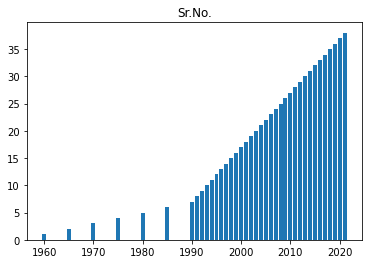

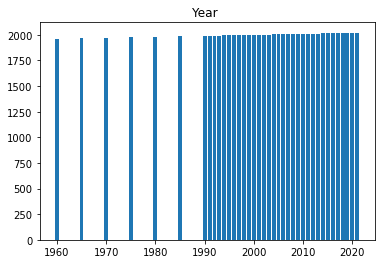

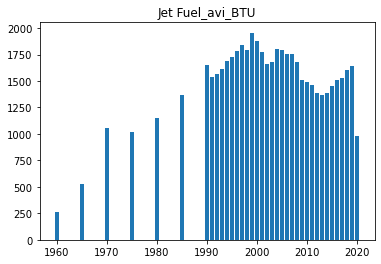

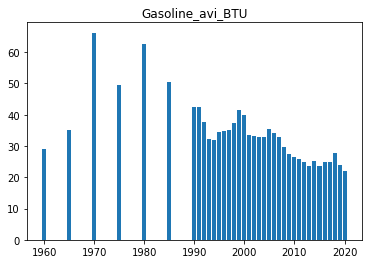

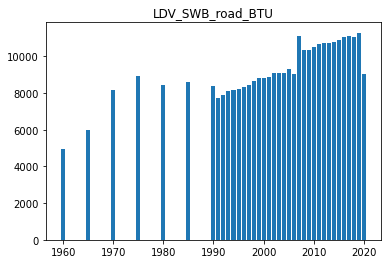

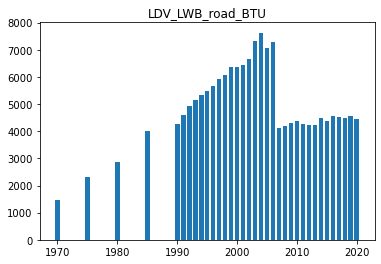

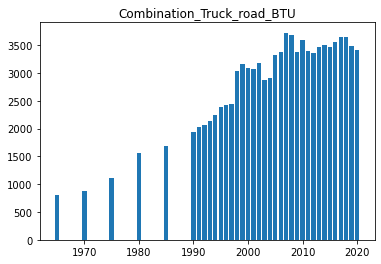

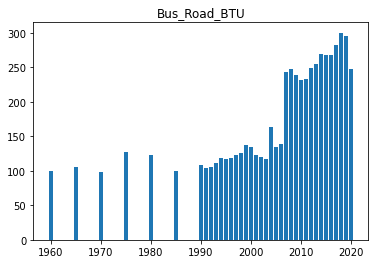

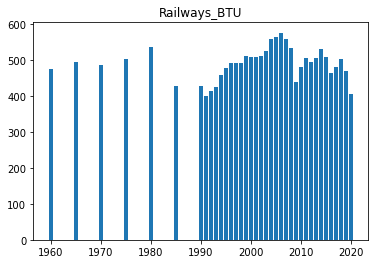

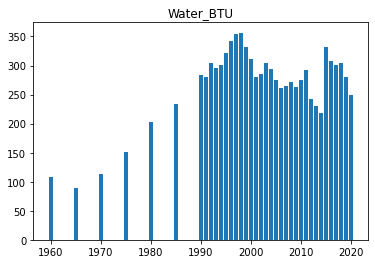

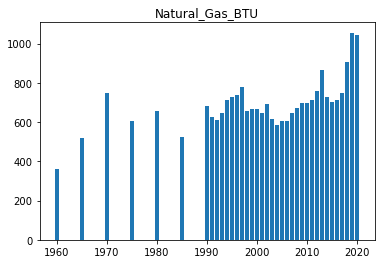

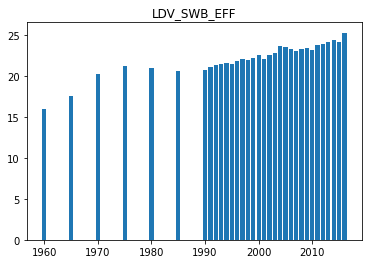

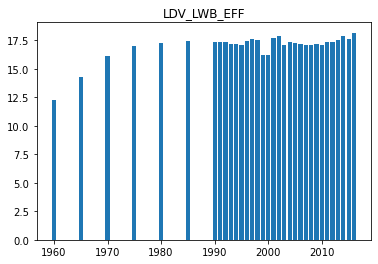

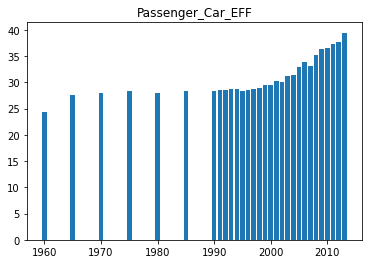

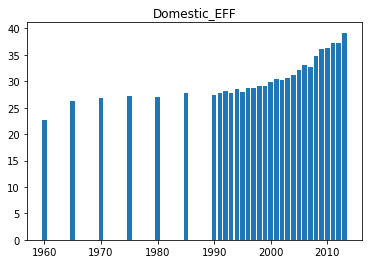

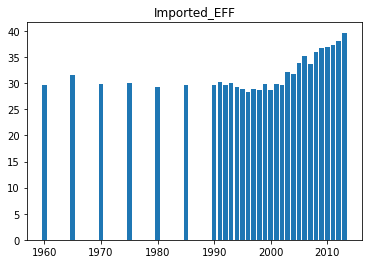

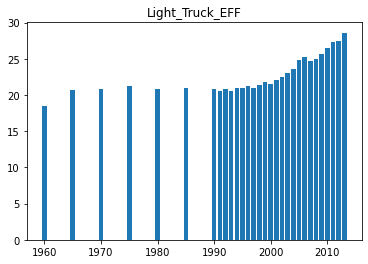

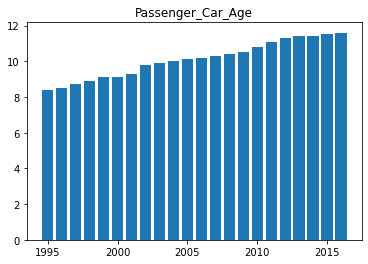

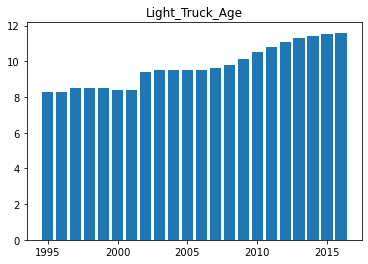

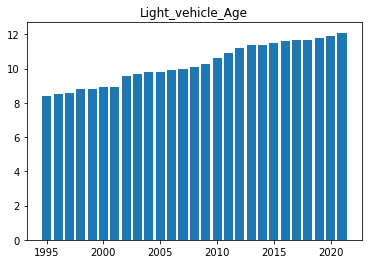

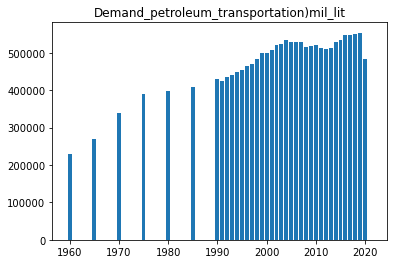

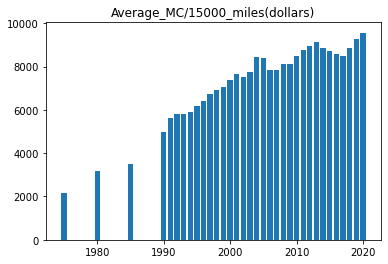

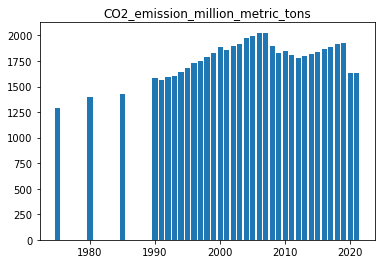

In [94]:
for i in df.columns:
    plt.bar(x = (df['Year ']),height=(df[i]))
    plt.title(i)
    plt.show()

#### Handling Missing Values

There are a lot of missing values to be handled, especially in Vehicles `age` and `efficiency`. Since this is a small dataset with 38 observations, we want to retain as much information as possible. The imputed missing values should follow the same trend across the years since this is a time-series data.

In [77]:
# Percentage of missing values
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Light_Truck_Age                            42.11
Passenger_Car_Age                          42.11
Light_vehicle_Age                          28.95
Light_Truck_EFF                            21.05
Imported_EFF                               21.05
Domestic_EFF                               21.05
Passenger_Car_EFF                          21.05
LDV_SWB_EFF                                13.16
LDV_LWB_EFF                                13.16
Average_MC/15000_miles(dollars)            10.53
CO2_emission_million_metric_tons            7.89
LDV_LWB_road_BTU                            7.89
Combination_Truck_road_BTU                  5.26
Natural_Gas_BTU                             2.63
Water_BTU                                   2.63
Railways_BTU                                2.63
Bus_Road_BTU                                2.63
LDV_SWB_road_BTU                            2.63
Gasoline_avi_BTU                            2.63
Jet Fuel_avi_BTU                            2.63
Year                

Column `Demand_petroleum_transportation)mil_lit` has 1 mistyped data:

In [95]:
# last row mistyped in Petroluem
df['Demand_petroleum_transportation)mil_lit'] = df['Demand_petroleum_transportation)mil_lit'].replace([3.50705060e+01],3.50705060e+05)


In time-independent data (non-time-series), a common practice is to fill the gaps with the mean or median value of the field. However, this is not applicable in the time series. So the imputation method should be dependent on time:
- Forward-fill method: fills the missing value with the previous value
- Backward-fill method: fills the missing value with the next value
- MICE
- Spline interpolation method


Columns with minimal missing values **(less than 2)** are handled using **Forward-fill** and **Backward-fill** method

In [96]:
# Columns that have missing values in the last row of data
df['Jet Fuel_avi_BTU'] = df['Jet Fuel_avi_BTU'].fillna(method='ffill')
df['Gasoline_avi_BTU'] = df['Gasoline_avi_BTU'].fillna(method='ffill')
df['Water_BTU'] = df['Water_BTU'].fillna(method='ffill')
df['Natural_Gas_BTU'] = df['Natural_Gas_BTU'].fillna(method='ffill')
df['Railways_BTU'] = df['Railways_BTU'].fillna(method='ffill')
df['LDV_SWB_road_BTU'] = df['LDV_SWB_road_BTU'].fillna(method='ffill')
df['Bus_Road_BTU']= df['Bus_Road_BTU'].fillna(method='ffill')
df['Combination_Truck_road_BTU']= df['Combination_Truck_road_BTU'].fillna(method='ffill')
df['LDV_LWB_road_BTU'] = df['LDV_LWB_road_BTU'].fillna(method='ffill')

In [97]:
# Columns that have missing values in first row of data
df['LDV_LWB_road_BTU'] = df['LDV_LWB_road_BTU'].fillna(method='bfill')
df['Combination_Truck_road_BTU']= df['Combination_Truck_road_BTU'].fillna(method='bfill')
df['LDV_SWB_road_BTU'] = df['LDV_SWB_road_BTU'].fillna(method='bfill')

In [81]:
# Percentage of missing values
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Light_Truck_Age                            42.11
Passenger_Car_Age                          42.11
Light_vehicle_Age                          28.95
Light_Truck_EFF                            21.05
Imported_EFF                               21.05
Domestic_EFF                               21.05
Passenger_Car_EFF                          21.05
LDV_SWB_EFF                                13.16
LDV_LWB_EFF                                13.16
Average_MC/15000_miles(dollars)            10.53
CO2_emission_million_metric_tons            7.89
Year                                        0.00
Natural_Gas_BTU                             0.00
Water_BTU                                   0.00
Railways_BTU                                0.00
Bus_Road_BTU                                0.00
Combination_Truck_road_BTU                  0.00
LDV_LWB_road_BTU                            0.00
LDV_SWB_road_BTU                            0.00
Gasoline_avi_BTU                            0.00
Demand_petroleum_tra

Columns with **more than 3 missing values** are handled using **MICE (Multivariate Imputation By Chained Equations)**:
- A technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value

In [51]:
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer

In [83]:
feature1 =df[['LDV_SWB_EFF', 'LDV_LWB_EFF', 'Passenger_Car_EFF', 'Domestic_EFF',
       'Imported_EFF', 'Light_Truck_EFF', 'Passenger_Car_Age',
       'Light_Truck_Age', 'Light_vehicle_Age',
       'Demand_petroleum_transportation)mil_lit',
       'Average_MC/15000_miles(dollars)', 'CO2_emission_million_metric_tons']]

In [84]:
# calling the  MICE class
mice_imputer = IterativeImputer(initial_strategy='median')
# imputing the missing value with mice imputer
feature1 = pd.DataFrame(mice_imputer.fit_transform(feature1),columns = feature1.columns)
feature1.tail()

,LDV_SWB_EFF,LDV_LWB_EFF,Passenger_Car_EFF,Domestic_EFF,Imported_EFF,Light_Truck_EFF,Passenger_Car_Age,Light_Truck_Age,Light_vehicle_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons
33,24.234602,18.185744,29.822125,29.166067,29.782679,22.004165,11.599652,11.668010,11.7,547276.174959,8468.000000,1886.292
34,24.243710,18.117797,29.800421,29.179152,29.768585,21.942210,11.651165,11.584309,11.7,549774.962911,8849.000000,1917.760
35,24.430782,18.180502,29.818663,29.207106,29.709360,21.862161,11.789930,11.660959,11.8,553756.463038,9282.000000,1923.853
36,23.689059,17.592144,29.637709,29.336583,29.536639,20.906299,11.556564,11.883927,11.9,483422.909983,9561.000000,1632.051
37,18.014902,14.569362,28.649878,28.778477,30.994801,21.734474,10.316106,11.908100,12.1,350705.060000,2302.612957,1632.051


Replace missing values with newly imputed columns:

In [87]:
df['Passenger_Car_Age'] = feature1['Passenger_Car_Age']
df['Light_Truck_Age'] = feature1['Light_Truck_Age']
df['Light_vehicle_Age'] = feature1['Light_vehicle_Age']
df['Average_MC/15000_miles(dollars)'] = feature1['Average_MC/15000_miles(dollars)']
df['CO2_emission_million_metric_tons'] = feature1['CO2_emission_million_metric_tons']
df['LDV_SWB_EFF'] = feature1['LDV_SWB_EFF']
df['LDV_LWB_EFF'] = feature1['LDV_LWB_EFF']
df['Passenger_Car_EFF'] = feature1['Passenger_Car_EFF']
df['Domestic_EFF'] = feature1['Domestic_EFF']
df['Imported_EFF'] = feature1['Imported_EFF']
df['Light_Truck_EFF'] = feature1['Light_Truck_EFF']
df['Domestic_EFF'] = feature1['Domestic_EFF']

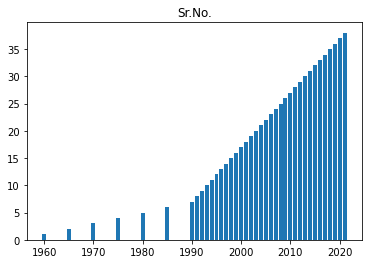

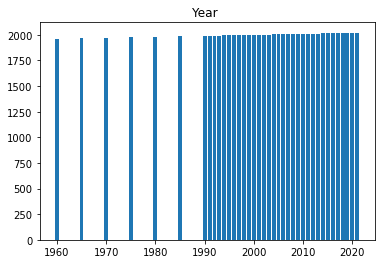

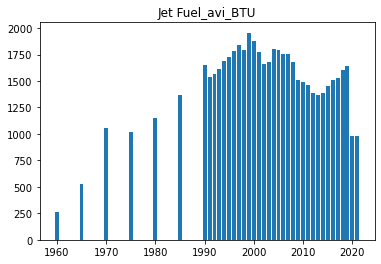

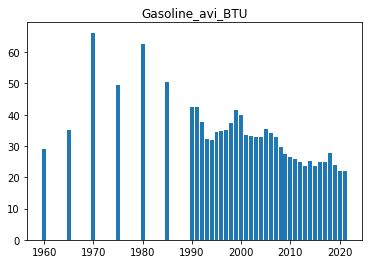

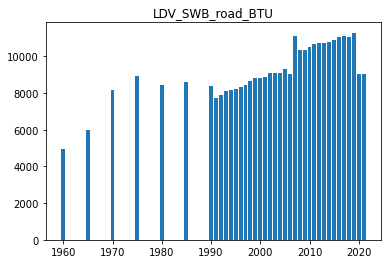

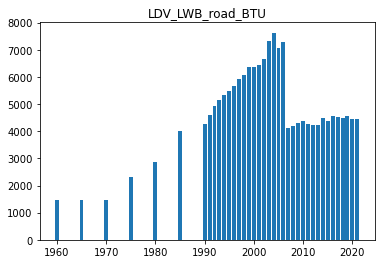

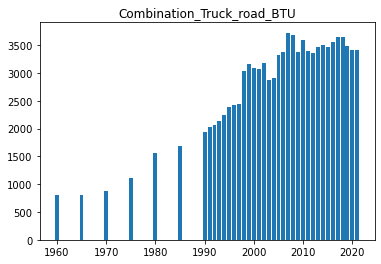

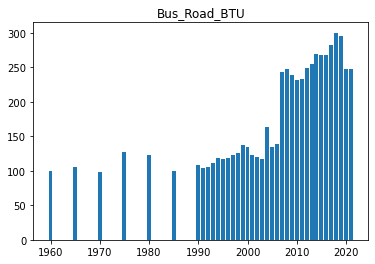

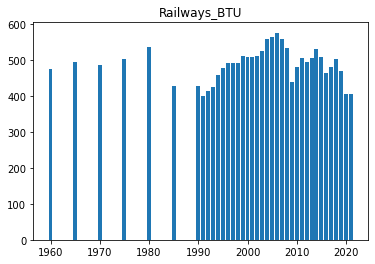

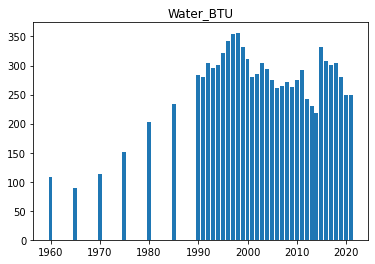

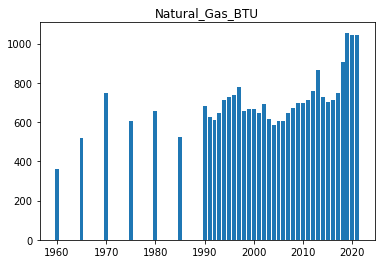

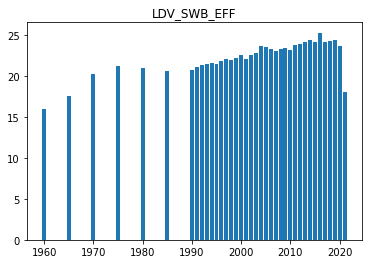

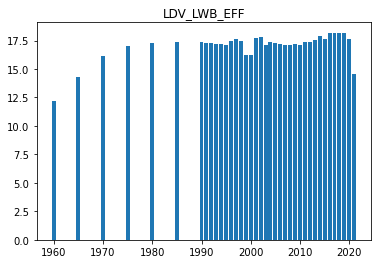

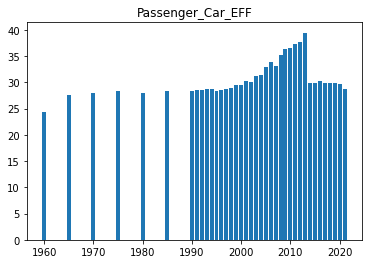

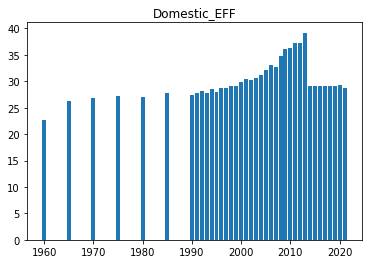

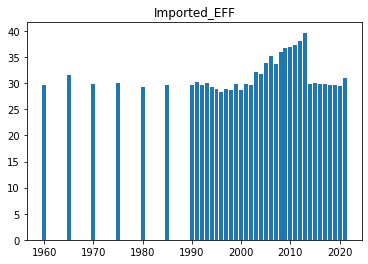

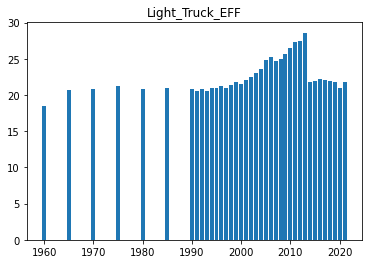

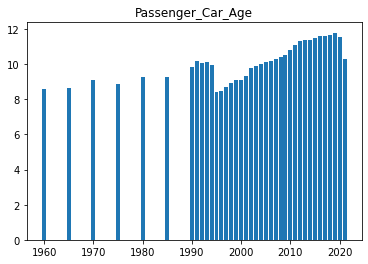

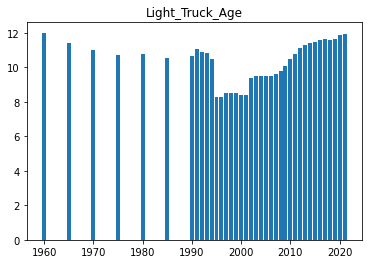

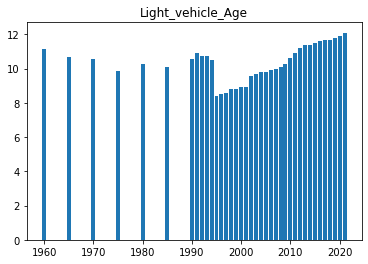

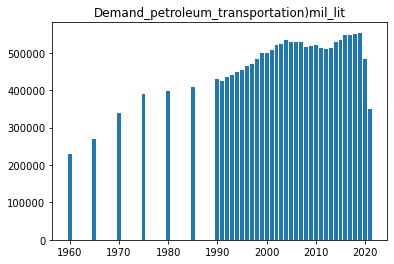

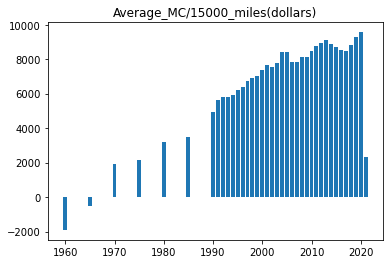

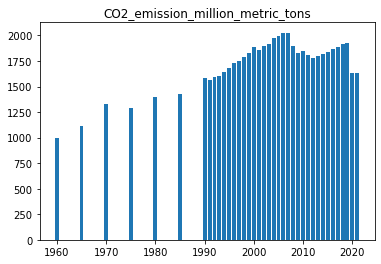

In [89]:
for i in df.columns:
    plt.bar(x = (df['Year ']),height=(df[i]))
    plt.title(i)
    plt.show()

Vehicles efficiency features imputation did not show increament over the years. So, other imputation method is needed. We use Spline Interpolation Method

In [49]:
df.Passenger_Car_EFF=df.Passenger_Car_EFF.interpolate(method='spline', order=2)
df.Imported_EFF=df.Imported_EFF.interpolate(method='spline', order=2)
df.Light_Truck_EFF=df.Light_Truck_EFF.interpolate(method='spline', order=2)
df.Domestic_EFF=df.Domestic_EFF.interpolate(method='spline', order=2)
df.LDV_SWB_EFF=df.LDV_SWB_EFF.interpolate(method='spline', order=2)
df.LDV_LWB_EFF=df.LDV_LWB_EFF.interpolate(method='spline', order=2)


C:\Users\Acer\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [78]:
# Percentage of missing values
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Sr.No.                                     0.0
LDV_SWB_EFF                                0.0
Volatile_compound_million_shots_tons       0.0
SOx_emission_million_shots_tons            0.0
particulate                                0.0
NOx_emission_million_shots_tons            0.0
CO_emission_million_shots_tons             0.0
CO2_emission_million_metric_tons           0.0
Average_MC/15000_miles(dollars)            0.0
Demand_petroleum_transportation)mil_lit    0.0
Light_vehicle_Age                          0.0
Light_Truck_Age                            0.0
Passenger_Car_Age                          0.0
LDV_LWB_EFF                                0.0
Light_Truck_EFF                            0.0
year                                       0.0
Imported_EFF                               0.0
Domestic_EFF                               0.0
Passenger_Car_EFF                          0.0
Natural_Gas_BTU                            0.0
Water_BTU                                  0.0
Railways_BTU 

In [81]:
# create excel writer object
writer = pd.ExcelWriter('clean.xlsx')
# write dataframe to excel
df.to_excel(writer)
# save the excel
writer.save()

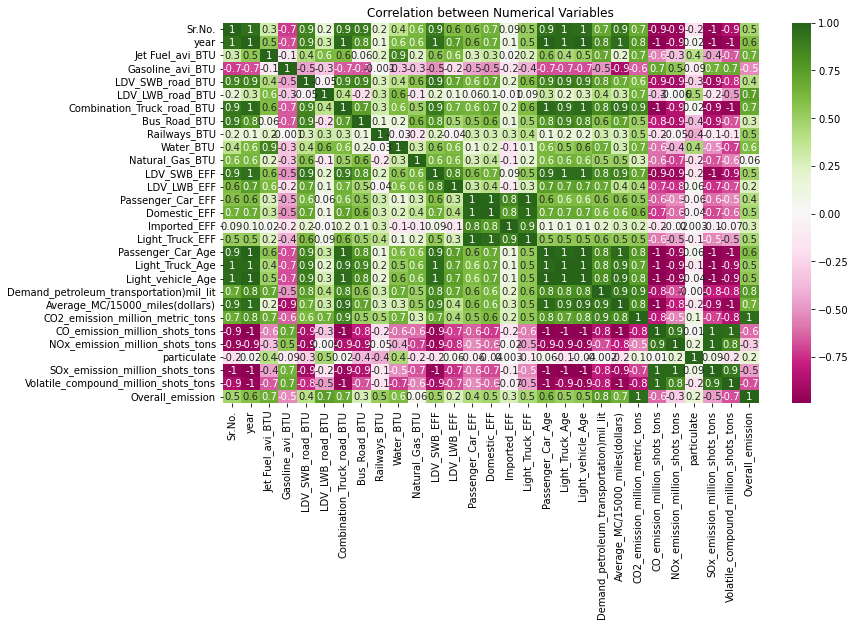

In [150]:
corr_matrix = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Correlation between Numerical Variables');